Part 1: PCA:

Problem Statement: The ‘Hair Salon.csv’View in a new window dataset contains various variables used for the context of Market Segmentation. This particular case study is based on various parameters of a salon chain of hair products. You are expected to do Principal Component Analysis for this case study according to the instructions given in the rubric. Kindly refer to the PCA_Data_Dictionary.jpgView in a new window file for the Data Dictionary of the Dataset.  
Note: This particular dataset contains the target variable satisfaction as well. Please do drop this variable before doing Principal Component Analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
pip install factor-analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 KB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.2/202.2 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 KB 15.1 MB/s eta 0:00:00
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=47ff0930340d8bc60c68b1d733ef4fea4aaa2230928996a59a07d88757b03160
  Stored in directory: /root/.cache/pip/wheels/f5/8f/2e/a689c21bc4bf04f84ceebf4b1f5846cacc04bfe179e7ad5ab0
Successfully built factor-analyzer


In [3]:
from factor_analyzer import FactorAnalyzer


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df=pd.read_csv('/content/drive/MyDrive/Factor-Hair-Revised (3).csv')

In [6]:
df.head(10)

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,1,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,2,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,3,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,4,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,5,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1
5,6,6.5,2.8,3.1,4.1,4.0,4.3,3.7,8.5,5.1,3.6,3.3,4.7
6,7,6.9,3.7,5.0,2.6,2.1,2.3,5.4,8.9,4.8,2.1,2.0,5.7
7,8,6.2,3.3,3.9,4.8,4.6,3.6,5.1,6.9,5.4,4.3,3.7,6.3
8,9,5.8,3.6,5.1,6.7,3.7,5.9,5.8,9.3,5.9,4.4,4.6,7.0
9,10,6.4,4.5,5.1,6.1,4.7,5.7,5.7,8.4,5.4,4.1,4.4,5.5


In [7]:
df.tail(10)

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
90,91,9.1,3.7,7.0,4.1,4.4,6.3,5.4,7.3,7.5,4.4,3.3,7.4
91,92,7.1,4.2,4.1,2.6,2.1,3.3,4.5,9.9,5.5,2.0,2.4,4.8
92,93,9.2,3.9,4.6,5.3,4.2,8.4,4.8,7.1,6.2,4.4,4.2,7.6
93,94,9.3,3.5,5.4,7.8,4.6,7.5,5.9,4.6,6.4,4.8,4.6,8.9
94,95,9.3,3.8,4.0,4.6,4.7,6.4,5.5,7.4,5.3,3.6,3.4,7.7
95,96,8.6,4.8,5.6,5.3,2.3,6.0,5.7,6.7,5.8,4.9,3.6,7.3
96,97,7.4,3.4,2.6,5.0,4.1,4.4,4.8,7.2,4.5,4.2,3.7,6.3
97,98,8.7,3.2,3.3,3.2,3.1,6.1,2.9,5.6,5.0,3.1,2.5,5.4
98,99,7.8,4.9,5.8,5.3,5.2,5.3,7.1,7.9,6.0,4.3,3.9,6.4
99,100,7.9,3.0,4.4,5.1,5.9,4.2,4.8,9.7,5.7,3.4,3.5,6.4


In [8]:
df.shape

(100, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            100 non-null    int64  
 1   ProdQual      100 non-null    float64
 2   Ecom          100 non-null    float64
 3   TechSup       100 non-null    float64
 4   CompRes       100 non-null    float64
 5   Advertising   100 non-null    float64
 6   ProdLine      100 non-null    float64
 7   SalesFImage   100 non-null    float64
 8   ComPricing    100 non-null    float64
 9   WartyClaim    100 non-null    float64
 10  OrdBilling    100 non-null    float64
 11  DelSpeed      100 non-null    float64
 12  Satisfaction  100 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 10.3 KB


In [10]:
df.isnull().sum().sum()

0

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100.0,50.500,29.011492,1.0,25.750,50.50,75.250,100.0
ProdQual,100.0,7.810,1.396279,5.0,6.575,8.00,9.100,10.0
Ecom,100.0,3.672,0.700516,2.2,3.275,3.60,3.925,5.7
TechSup,100.0,5.365,1.530457,1.3,4.250,5.40,6.625,8.5
CompRes,100.0,5.442,1.208403,2.6,4.600,5.45,6.325,7.8
Advertising,100.0,4.010,1.126943,1.9,3.175,4.00,4.800,6.5
ProdLine,100.0,5.805,1.315285,2.3,4.700,5.75,6.800,8.4
SalesFImage,100.0,5.123,1.072320,2.9,4.500,4.90,5.800,8.2
ComPricing,100.0,6.974,1.545055,3.7,5.875,7.10,8.400,9.9
WartyClaim,100.0,6.043,0.819738,4.1,5.400,6.10,6.600,8.1


In [12]:
from matplotlib import pyplot as plt

In [13]:
df1=df.drop(['Satisfaction','ID'],axis=1)

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProdQual     100 non-null    float64
 1   Ecom         100 non-null    float64
 2   TechSup      100 non-null    float64
 3   CompRes      100 non-null    float64
 4   Advertising  100 non-null    float64
 5   ProdLine     100 non-null    float64
 6   SalesFImage  100 non-null    float64
 7   ComPricing   100 non-null    float64
 8   WartyClaim   100 non-null    float64
 9   OrdBilling   100 non-null    float64
 10  DelSpeed     100 non-null    float64
dtypes: float64(11)
memory usage: 8.7 KB


In [15]:
df1.describe()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.00000,100.000000
mean,7.810000,3.672000,5.365000,5.442000,4.010000,5.805000,5.12300,6.974000,6.043000,4.27800,3.886000
std,1.396279,0.700516,1.530457,1.208403,1.126943,1.315285,1.07232,1.545055,0.819738,0.92884,0.734437
min,5.000000,2.200000,1.300000,2.600000,1.900000,2.300000,2.90000,3.700000,4.100000,2.00000,1.600000
25%,6.575000,3.275000,4.250000,4.600000,3.175000,4.700000,4.50000,5.875000,5.400000,3.70000,3.400000
50%,8.000000,3.600000,5.400000,5.450000,4.000000,5.750000,4.90000,7.100000,6.100000,4.40000,3.900000
75%,9.100000,3.925000,6.625000,6.325000,4.800000,6.800000,5.80000,8.400000,6.600000,4.80000,4.425000
max,10.000000,5.700000,8.500000,7.800000,6.500000,8.400000,8.20000,9.900000,8.100000,6.70000,5.500000


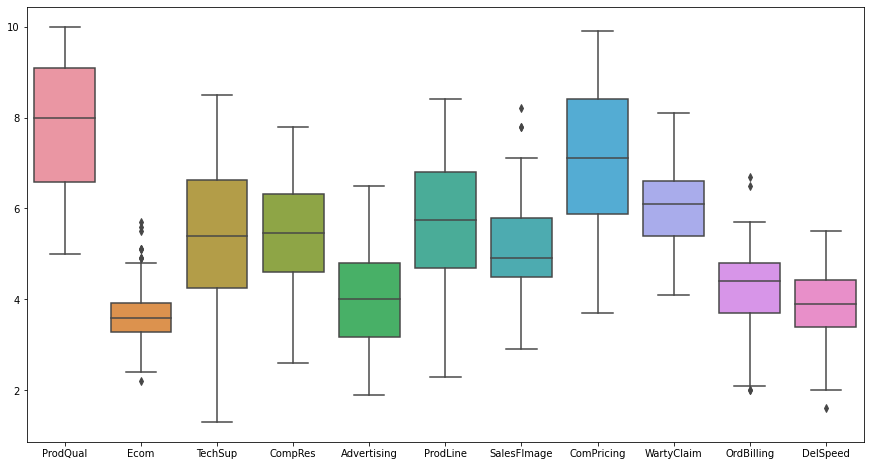

In [16]:
plt.figure(figsize = (15,8));
sns.boxplot(data=df1);


<Figure size 72x72 with 0 Axes>

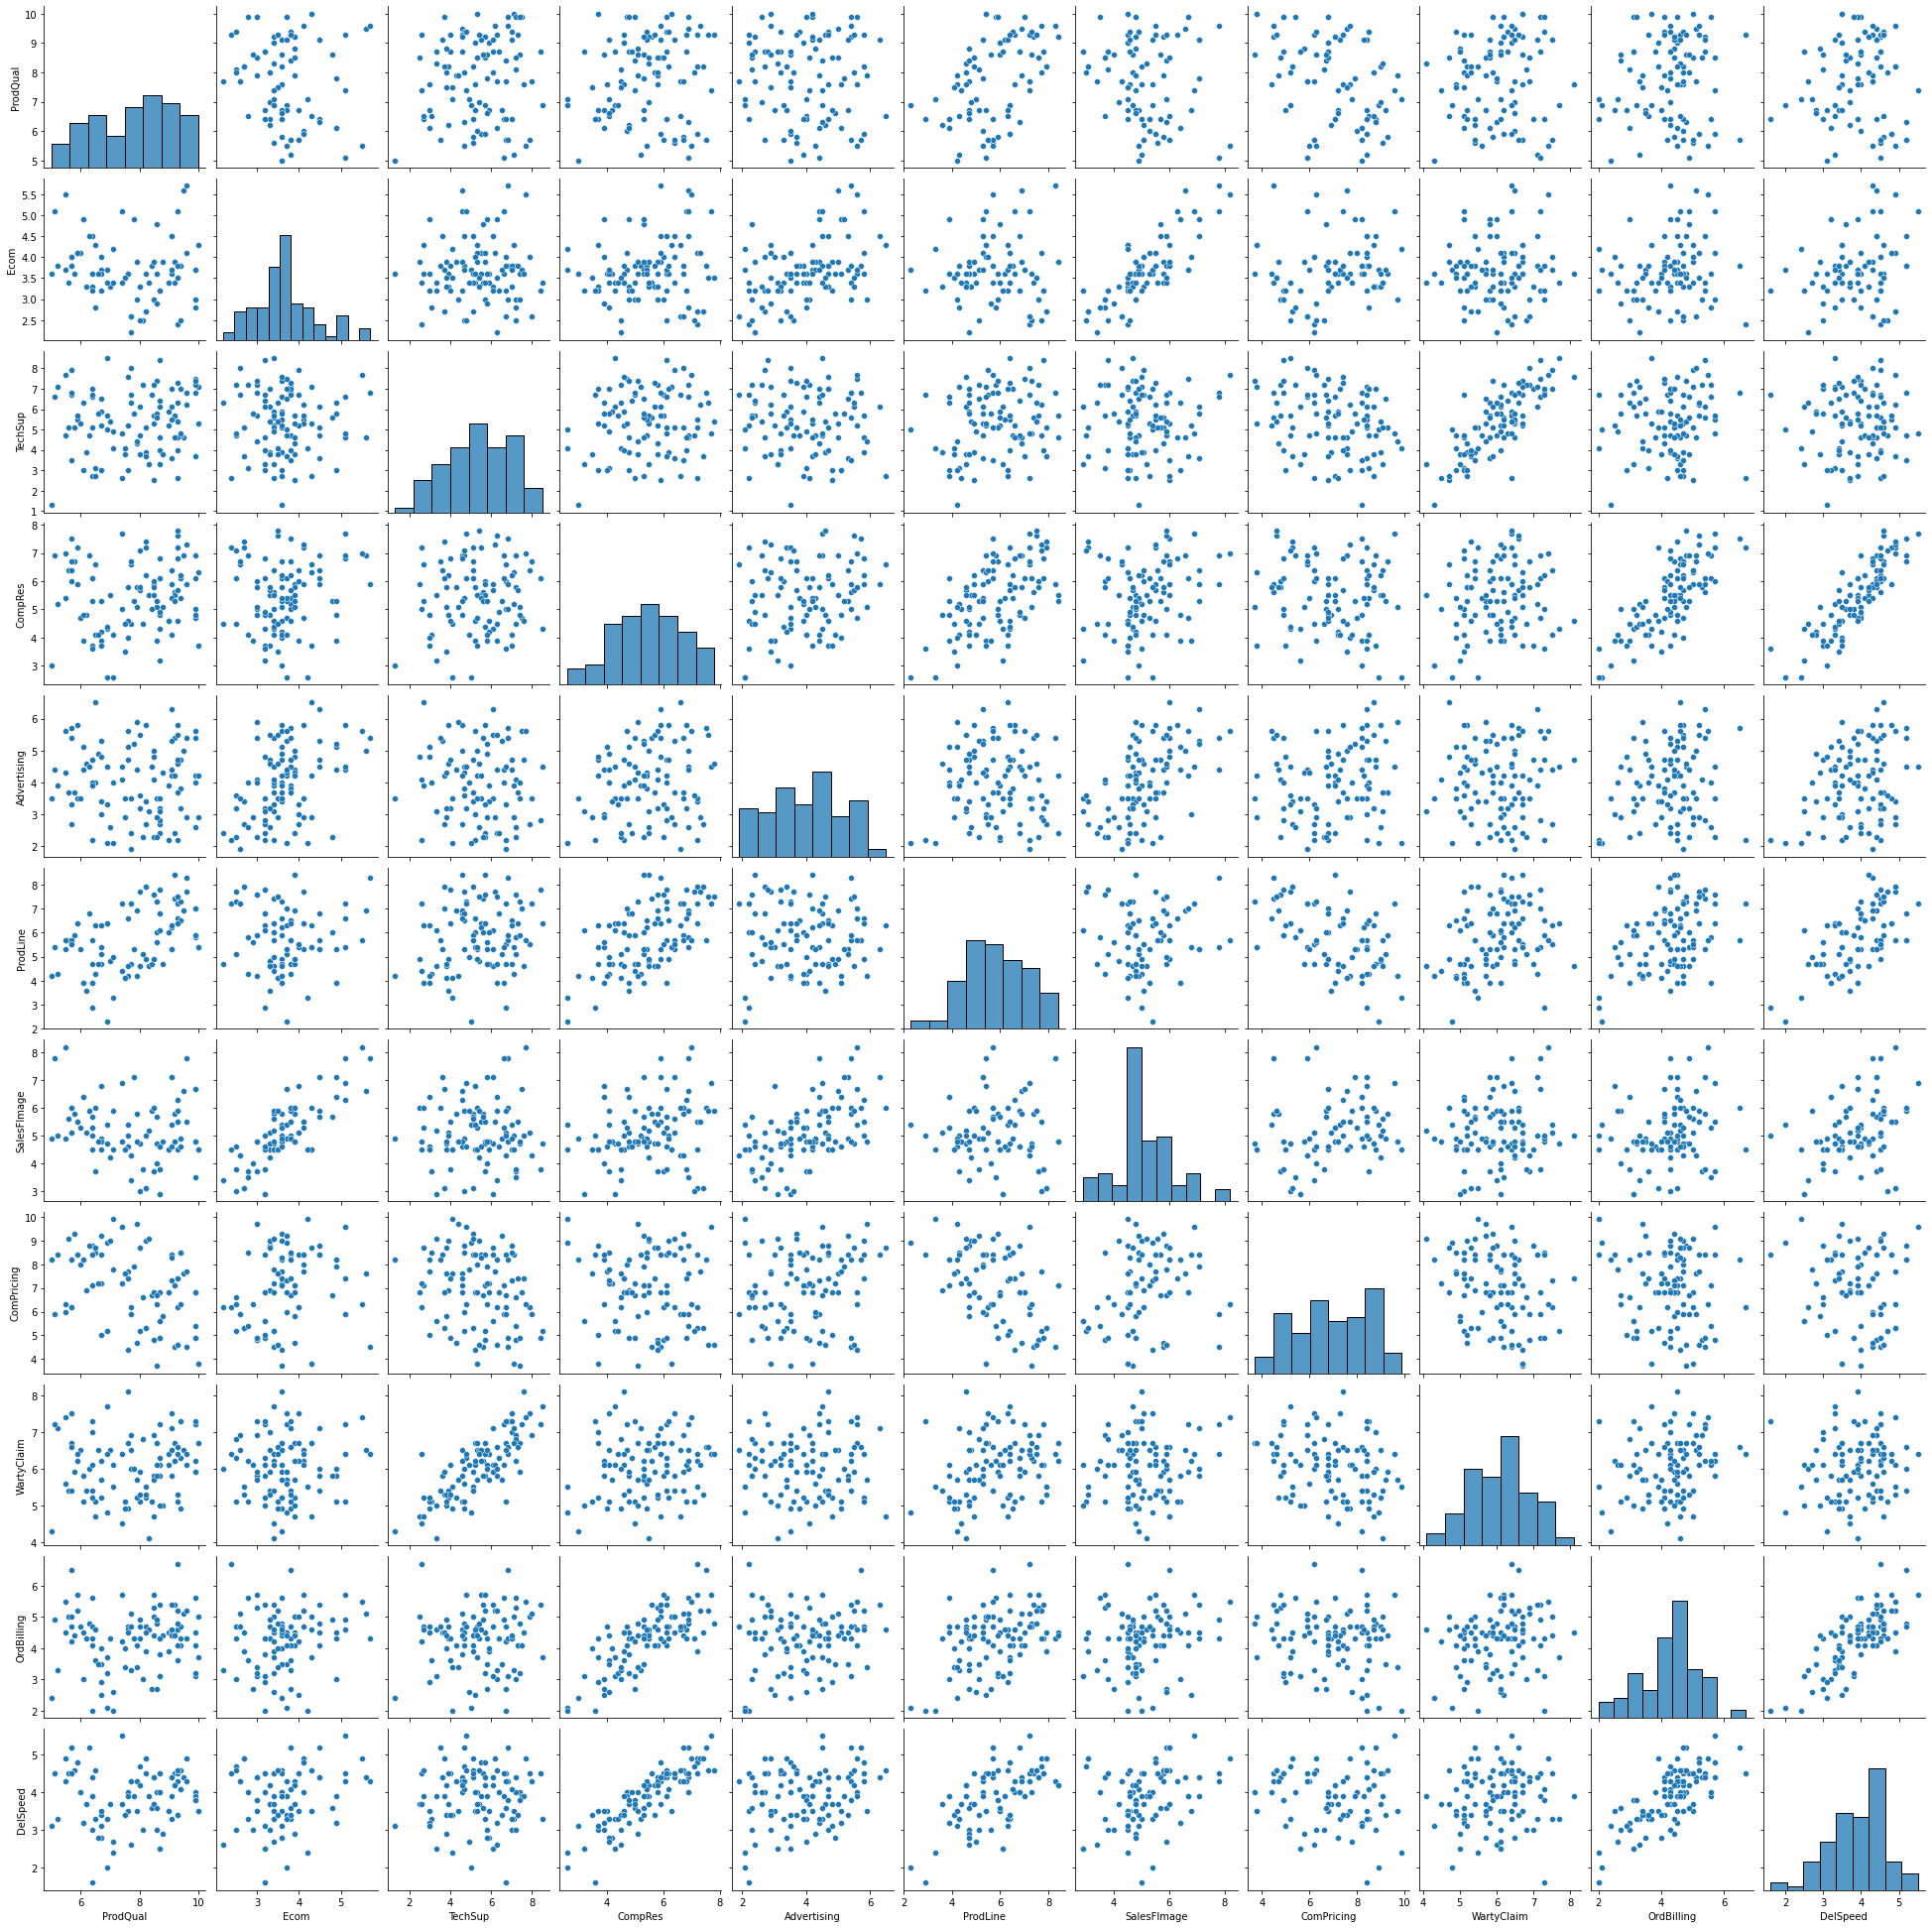

In [17]:
plt.figure(figsize = (1,1));
sns.pairplot(data=df1);

In [18]:
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings("ignore")

#Z-score scaling

In [19]:
df2 = df1.apply(zscore)
df2.head()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
0,0.496660,0.327114,-1.881421,0.380922,0.704543,-0.691530,0.821973,-0.113185,-1.646582,0.781230,-0.254531
1,0.280721,-1.394538,-0.174023,1.462141,-0.544014,1.600835,-1.896068,-1.088915,-0.665744,-0.409009,1.387605
2,1.000518,-0.390241,0.154322,0.131410,1.239639,1.218774,0.634522,-1.609304,0.192489,1.214044,0.840226
3,-1.014914,-0.533712,1.073690,-1.448834,0.615361,-0.844354,-0.583910,1.187789,1.173327,0.023805,-1.212443
4,0.856559,-0.390241,-0.108354,-0.700298,-1.614207,0.149004,-0.583910,-0.113185,0.069885,0.240212,-0.528220


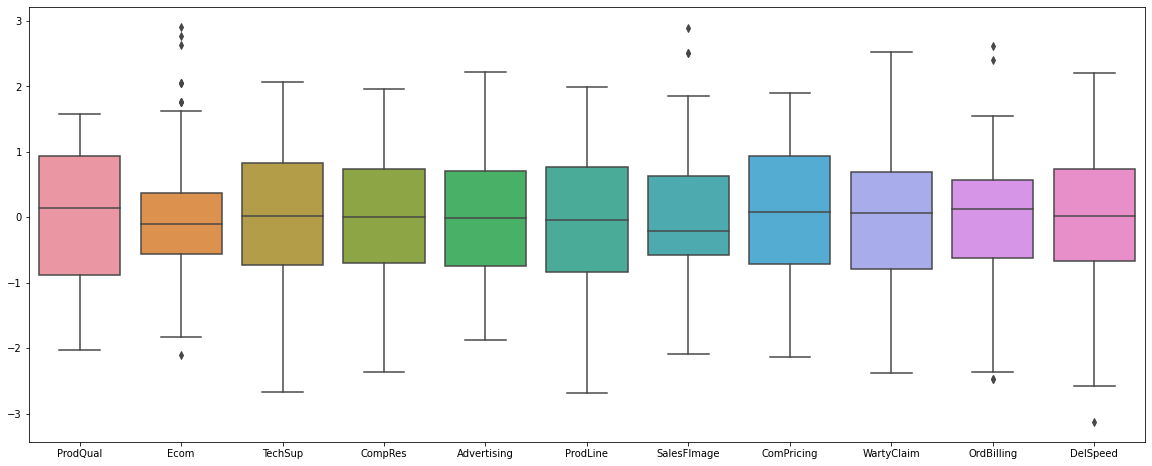

In [20]:
plt.figure(figsize = (20,8))
sns.boxplot(data = df2)
plt.show()

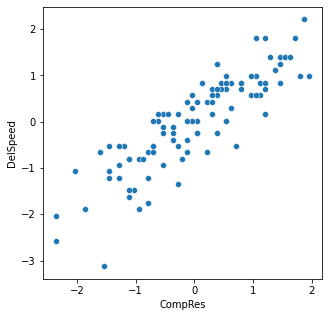

In [151]:
plt.figure(figsize = (5,5));
sns.scatterplot(data=df2, x='CompRes', y='DelSpeed');

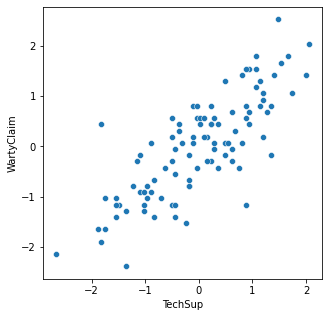

In [152]:
plt.figure(figsize = (5,5));
sns.scatterplot(data=df2, x='TechSup', y='WartyClaim');

<Figure size 72x72 with 0 Axes>

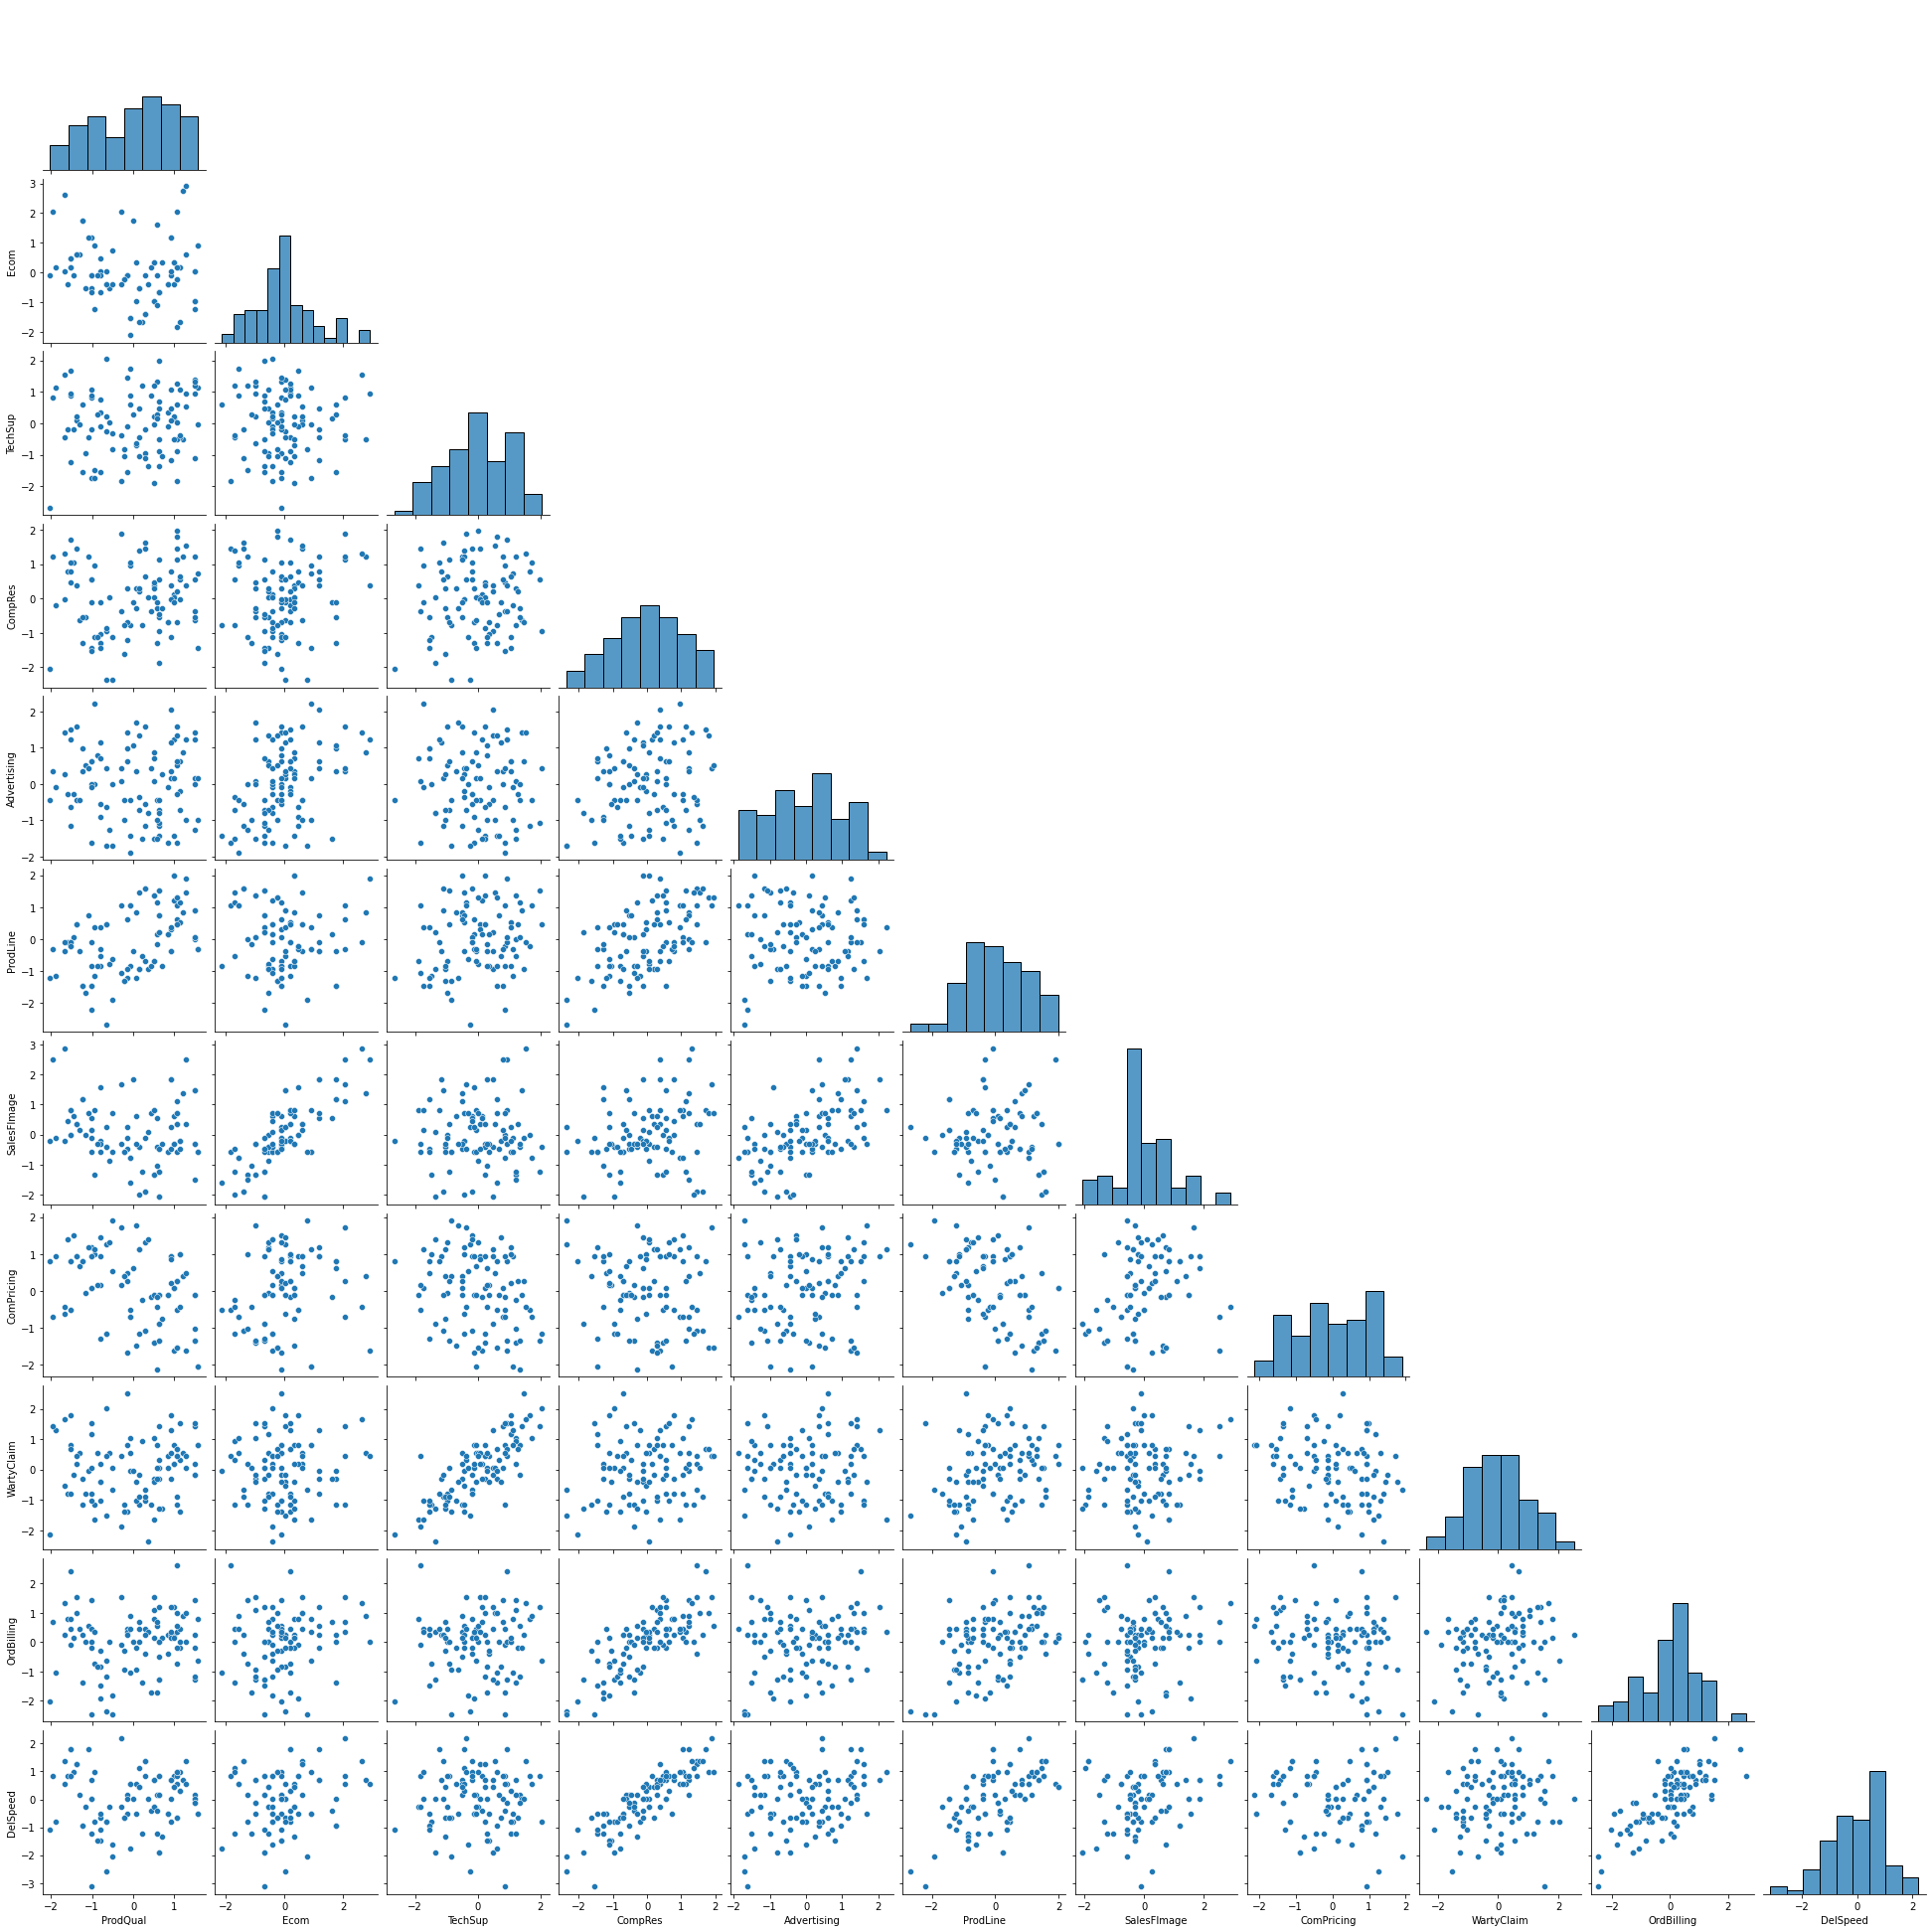

In [21]:
plt.figure(figsize = (1,1));
sns.pairplot(data=df2, corner=True);

In [22]:
df2.corr()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
ProdQual,1.000000,-0.137163,0.095600,0.106370,-0.053473,0.477493,-0.151813,-0.401282,0.088312,0.104303,0.027718
Ecom,-0.137163,1.000000,0.000867,0.140179,0.429891,-0.052688,0.791544,0.229462,0.051898,0.156147,0.191636
TechSup,0.095600,0.000867,1.000000,0.096657,-0.062870,0.192625,0.016991,-0.270787,0.797168,0.080102,0.025441
CompRes,0.106370,0.140179,0.096657,1.000000,0.196917,0.561417,0.229752,-0.127954,0.140408,0.756869,0.865092
Advertising,-0.053473,0.429891,-0.062870,0.196917,1.000000,-0.011551,0.542204,0.134217,0.010792,0.184236,0.275863
ProdLine,0.477493,-0.052688,0.192625,0.561417,-0.011551,1.000000,-0.061316,-0.494948,0.273078,0.424408,0.601850
SalesFImage,-0.151813,0.791544,0.016991,0.229752,0.542204,-0.061316,1.000000,0.264597,0.107455,0.195127,0.271551
ComPricing,-0.401282,0.229462,-0.270787,-0.127954,0.134217,-0.494948,0.264597,1.000000,-0.244986,-0.114567,-0.072872
WartyClaim,0.088312,0.051898,0.797168,0.140408,0.010792,0.273078,0.107455,-0.244986,1.000000,0.197065,0.109395
OrdBilling,0.104303,0.156147,0.080102,0.756869,0.184236,0.424408,0.195127,-0.114567,0.197065,1.000000,0.751003


#Before scaling

In [134]:
df1.corr()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
ProdQual,1.000000,-0.161588,0.095600,0.106370,-0.053473,0.477493,-0.146498,-0.401282,0.088312,0.102495,0.024332
Ecom,-0.161588,1.000000,-0.018786,0.109386,0.425123,-0.096342,0.779244,0.268064,0.027380,0.146505,0.168147
TechSup,0.095600,-0.018786,1.000000,0.096657,-0.062870,0.192625,0.009836,-0.270787,0.797168,0.085443,0.028898
CompRes,0.106370,0.109386,0.096657,1.000000,0.196917,0.561417,0.226647,-0.127954,0.140408,0.757995,0.868846
Advertising,-0.053473,0.425123,-0.062870,0.196917,1.000000,-0.011551,0.542923,0.134217,0.010792,0.188005,0.272973
ProdLine,0.477493,-0.096342,0.192625,0.561417,-0.011551,1.000000,-0.062584,-0.494948,0.273078,0.423870,0.600272
SalesFImage,-0.146498,0.779244,0.009836,0.226647,0.542923,-0.062584,1.000000,0.271246,0.100953,0.194695,0.271213
ComPricing,-0.401282,0.268064,-0.270787,-0.127954,0.134217,-0.494948,0.271246,1.000000,-0.244986,-0.113318,-0.070289
WartyClaim,0.088312,0.027380,0.797168,0.140408,0.010792,0.273078,0.100953,-0.244986,1.000000,0.198106,0.116168
OrdBilling,0.102495,0.146505,0.085443,0.757995,0.188005,0.423870,0.194695,-0.113318,0.198106,1.000000,0.752298


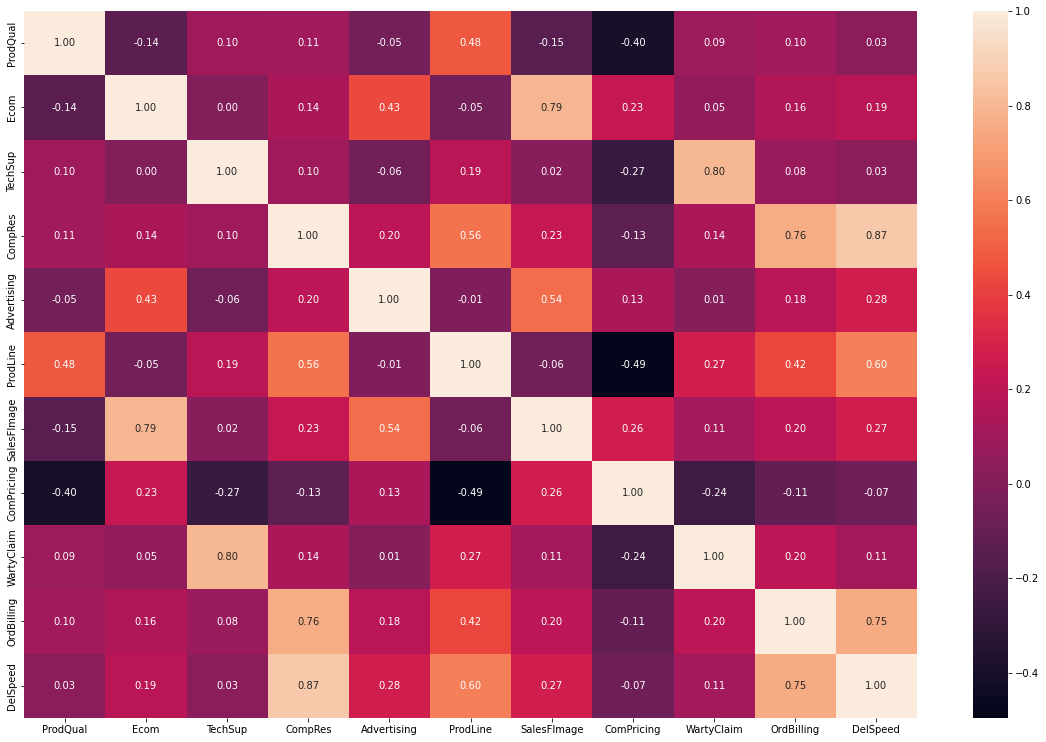

In [23]:
plt.figure(figsize = (20,13))
sns.heatmap(df1.corr(), annot=True,fmt='.2f');

#After scaling

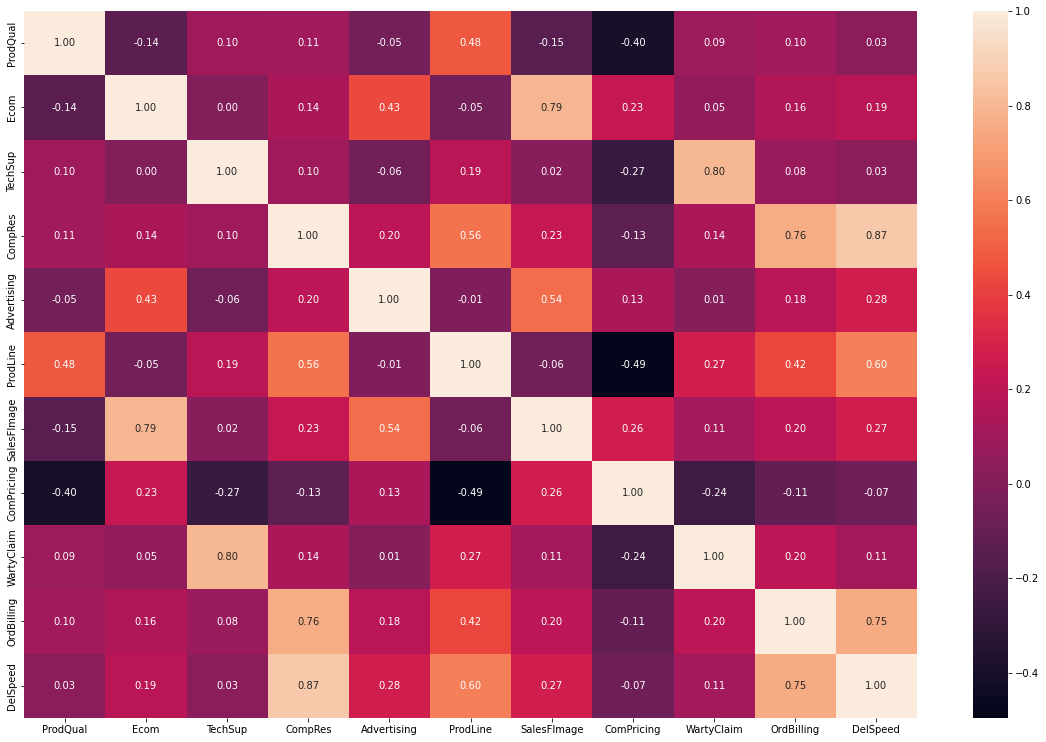

In [24]:
plt.figure(figsize = (20,13))
sns.heatmap(df2.corr(), annot=True,fmt='.2f');

ProdQual
Skew : -0.24


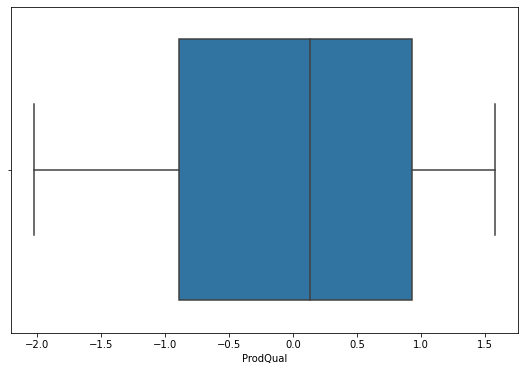

Ecom
Skew : 0.66


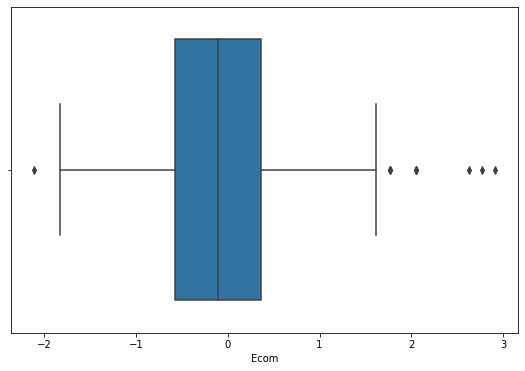

TechSup
Skew : -0.2


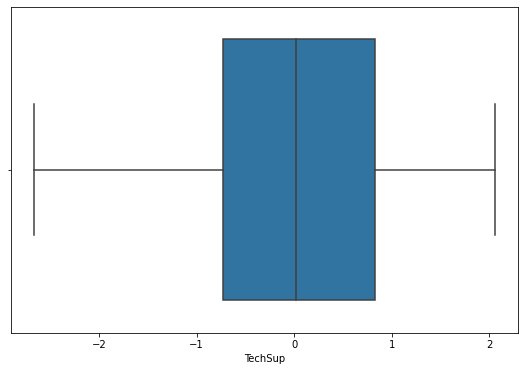

CompRes
Skew : -0.14


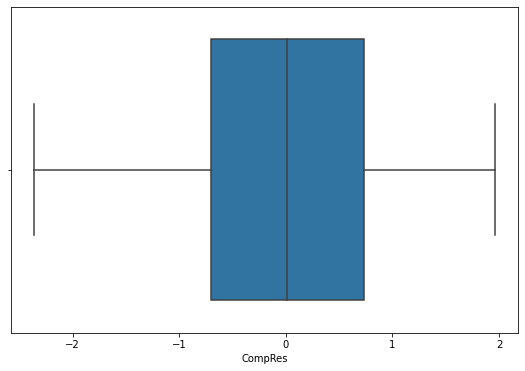

Advertising
Skew : 0.04


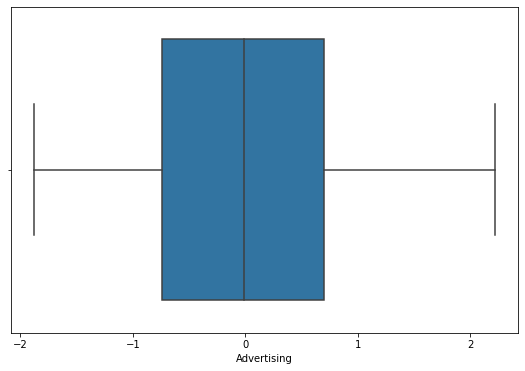

ProdLine
Skew : -0.09


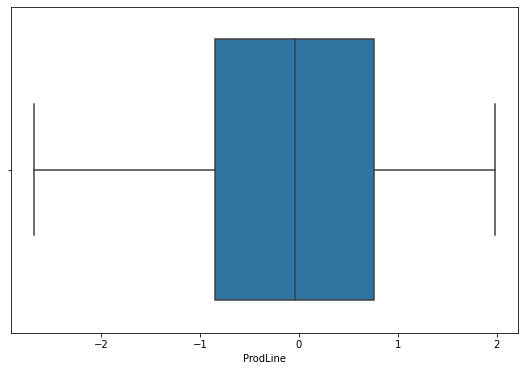

SalesFImage
Skew : 0.38


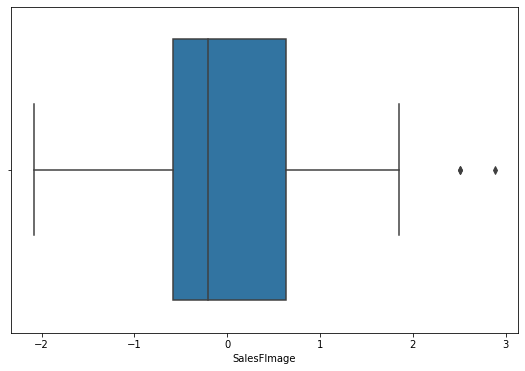

ComPricing
Skew : -0.24


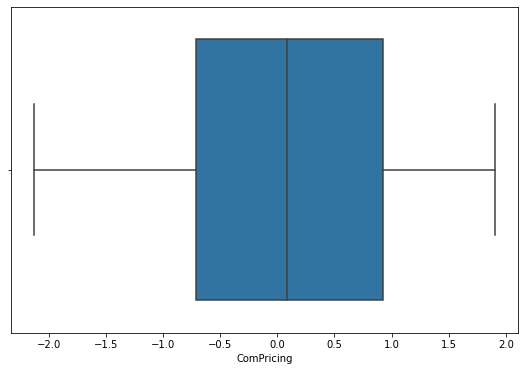

WartyClaim
Skew : 0.01


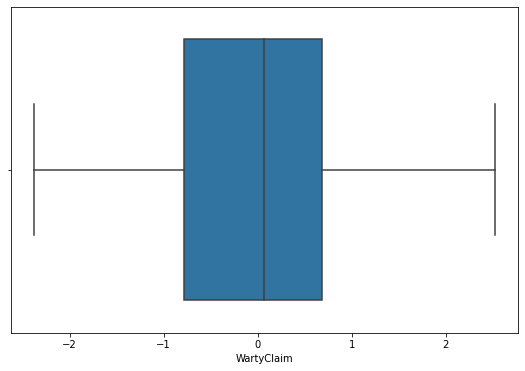

OrdBilling
Skew : -0.33


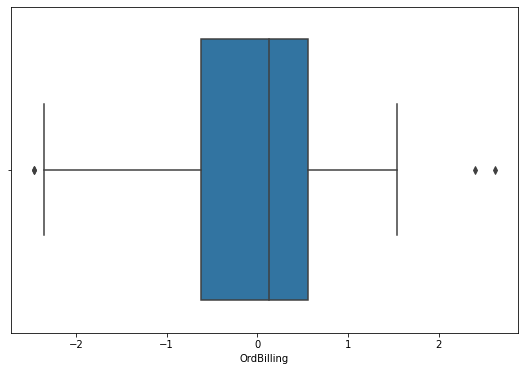

DelSpeed
Skew : -0.46


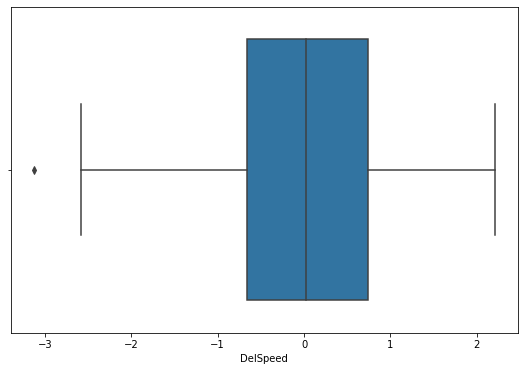

In [131]:
for col in df2.columns:
    print(col)
    print('Skew :',round(df2[col].skew(),2))
    plt.figure(figsize=(20,6))
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df2[col])
    plt.show()

#P-Value

In [144]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df2)
p_value
print("P-Value is",p_value)

P-Value is 1.793370009363654e-96


#KMO Model

In [133]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df2)
print("MSA is",kmo_model)


MSA is 0.6531422230688922


In [31]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=10, random_state=123)
d_pca1 = pca1.fit_transform(df2)
d_pca1.transpose()

array([[ 7.95507962e-02, -1.10096634e+00, -2.19706653e+00,
         1.56293289e+00,  7.67570385e-01,  2.90862177e+00,
         5.29319132e+00,  1.47659077e+00, -6.13947615e-01,
        -4.23660076e-01,  5.76252311e-01,  1.86757037e+00,
        -2.66029481e+00, -1.15437973e+00, -1.98252867e+00,
        -1.19534642e+00, -6.29210603e-01, -1.94912563e+00,
        -4.40654330e-01, -1.18679105e+00,  1.32903312e+00,
        -3.07501457e+00, -1.22862294e+00, -1.95215660e+00,
         2.77114349e-01, -3.38635080e-01, -1.76471720e+00,
         1.03510170e+00, -1.29479142e+00,  1.66262708e+00,
         1.44608491e-01,  2.11462740e+00,  1.06970726e+00,
        -1.09408090e-01,  1.80536022e+00,  2.12248520e+00,
         6.22051111e-01, -2.57411754e+00, -3.44966983e-01,
         1.21539637e+00,  1.25487586e+00,  1.67930781e-01,
        -1.82095895e+00, -2.33269255e+00, -8.73288881e-01,
        -1.65347263e+00, -1.03184895e+00, -3.12115015e+00,
        -1.07236222e+00, -7.97675229e-01,  1.98945764e+0

In [32]:
np.cov(d_pca1)

array([[ 0.53581067, -0.03206695,  0.33199836, ..., -0.10256236,
         0.15565905,  0.24606466],
       [-0.03206695,  1.52499975,  0.30034491, ...,  0.43658831,
        -0.83920064, -0.34955129],
       [ 0.33199836,  0.30034491,  0.97112912, ..., -0.30144808,
         0.0986921 , -0.41334004],
       ...,
       [-0.10256236,  0.43658831, -0.30144808, ...,  1.9800132 ,
        -0.80825161,  0.23444317],
       [ 0.15565905, -0.83920064,  0.0986921 , ..., -0.80825161,
         0.8837573 ,  0.09352861],
       [ 0.24606466, -0.34955129, -0.41334004, ...,  0.23444317,
         0.09352861,  1.14891955]])

In [33]:
pca1.components_

array([[-0.13378962, -0.16595278, -0.15769263, -0.47068359, -0.18373495,
        -0.38676517, -0.2036696 ,  0.15168864, -0.21293363, -0.43721774,
        -0.47308914],
       [-0.31349802,  0.44650918, -0.23096734,  0.01944394,  0.36366471,
        -0.28478056,  0.47069599,  0.4134565 , -0.19167191,  0.02639905,
         0.07305172],
       [ 0.06227164, -0.23524791, -0.61095105,  0.21035078, -0.08809705,
         0.11627864, -0.2413421 ,  0.05304529, -0.59856398,  0.16892981,
         0.23262477],
       [ 0.6431362 ,  0.27238033, -0.19339314, -0.20632037,  0.31789448,
         0.20290226,  0.22217722, -0.33354348, -0.18530205, -0.23685365,
        -0.1973299 ],
       [ 0.2316662 ,  0.42228844, -0.02395667,  0.02865743, -0.80387024,
         0.11667416,  0.20437283,  0.24892601, -0.03292706,  0.02675377,
        -0.03543294],
       [-0.56456996,  0.26325703, -0.10876896, -0.02815231, -0.20056937,
         0.09819533,  0.10497225, -0.70973595, -0.13983966, -0.11947974,
         0.029

In [34]:
pca1.explained_variance_

array([3.4615872 , 2.57666335, 1.70805705, 1.09753137, 0.61557989,
       0.55745836, 0.40557389, 0.249446  , 0.20560936, 0.13418341])

In [35]:
pca1.explained_variance_ratio_

array([0.31154285, 0.2318997 , 0.15372513, 0.09877782, 0.05540219,
       0.05017125, 0.03650165, 0.02245014, 0.01850484, 0.01207651])

In [36]:
d_extracted = pd.DataFrame(pca1.components_.T,columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7','PC8', 'PC9', 'PC10'],index = df2.columns)

In [37]:
np.cumsum(pca1.explained_variance_ratio_)

array([0.31154285, 0.54344255, 0.69716768, 0.79594551, 0.8513477 ,
       0.90151895, 0.9380206 , 0.96047074, 0.97897558, 0.99105209])

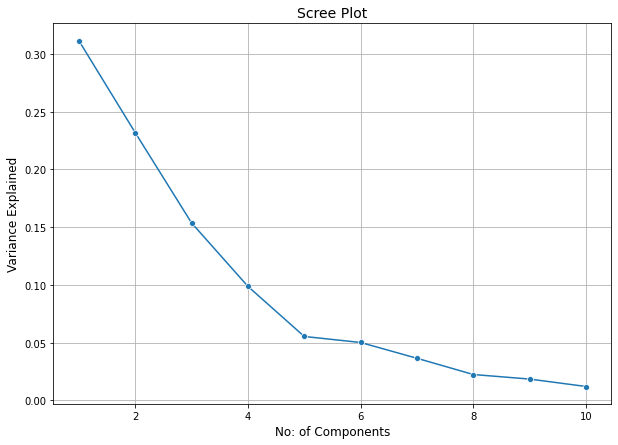

In [38]:
plt.figure(figsize=(10,7));
sns.lineplot(y=pca1.explained_variance_ratio_ ,x=range(1,11),marker='o');
plt.title('Scree Plot',fontsize=14);
plt.xlabel('No: of Components',fontsize=12);
plt.ylabel('Variance Explained',fontsize=12);
plt.grid()

In [39]:
d_selected = d_extracted[['PC1','PC2', 'PC3', 'PC4', 'PC5','PC6']]

In [40]:
d_selected

,PC1,PC2,PC3,PC4,PC5,PC6
ProdQual,-0.133790,-0.313498,0.062272,0.643136,0.231666,-0.564570
Ecom,-0.165953,0.446509,-0.235248,0.272380,0.422288,0.263257
TechSup,-0.157693,-0.230967,-0.610951,-0.193393,-0.023957,-0.108769
CompRes,-0.470684,0.019444,0.210351,-0.206320,0.028657,-0.028152
Advertising,-0.183735,0.363665,-0.088097,0.317894,-0.803870,-0.200569
ProdLine,-0.386765,-0.284781,0.116279,0.202902,0.116674,0.098195
SalesFImage,-0.203670,0.470696,-0.241342,0.222177,0.204373,0.104972
ComPricing,0.151689,0.413457,0.053045,-0.333543,0.248926,-0.709736
WartyClaim,-0.212934,-0.191672,-0.598564,-0.185302,-0.032927,-0.139840
OrdBilling,-0.437218,0.026399,0.168930,-0.236854,0.026754,-0.119480


In [135]:
d_selected.style.highlight_max(color = 'lightblue', axis = 0)

,PC1,PC2,PC3,PC4,PC5,PC6
ProdQual,-0.133790,-0.313498,0.062272,0.643136,0.231666,-0.564570
Ecom,-0.165953,0.446509,-0.235248,0.272380,0.422288,0.263257
TechSup,-0.157693,-0.230967,-0.610951,-0.193393,-0.023957,-0.108769
CompRes,-0.470684,0.019444,0.210351,-0.206320,0.028657,-0.028152
Advertising,-0.183735,0.363665,-0.088097,0.317894,-0.803870,-0.200569
ProdLine,-0.386765,-0.284781,0.116279,0.202902,0.116674,0.098195
SalesFImage,-0.203670,0.470696,-0.241342,0.222177,0.204373,0.104972
ComPricing,0.151689,0.413457,0.053045,-0.333543,0.248926,-0.709736
WartyClaim,-0.212934,-0.191672,-0.598564,-0.185302,-0.032927,-0.139840
OrdBilling,-0.437218,0.026399,0.168930,-0.236854,0.026754,-0.119480


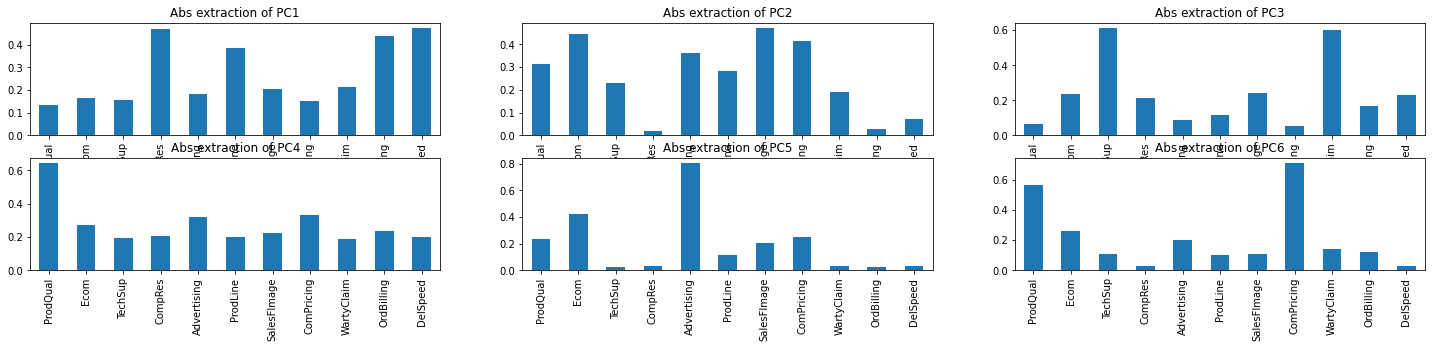

In [41]:
plt.figure(figsize = (25,12))
for i in range(len(d_selected.columns)):
    plt.subplot(5, 3, i + 1)
    abs(d_selected[d_selected.columns[i]]).T.plot.bar()
    plt.title('Abs extraction of {}'.format(d_selected.columns[i]))

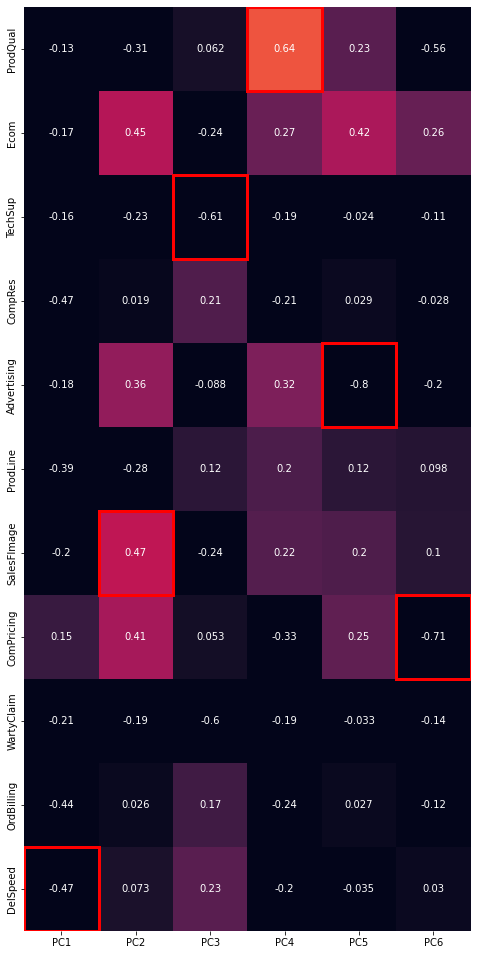

In [42]:
fig,ax = plt.subplots(figsize = (8, 17), facecolor = 'w', edgecolor = 'k')
ax = sns.heatmap(d_selected, annot = True, vmax = 1.0, vmin = 0, cbar = False, fmt = '.2g', ax = ax,)
column_max = d_selected.abs().idxmax(axis = 0)
for col, variable in enumerate(d_selected.columns):
    position = d_selected.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill = False, edgecolor = 'red', lw = 3))

In [141]:
pca2 = PCA(n_components = 6, random_state = 100)
final_pca = pca2.fit_transform(df2)

In [145]:
final_pca_d = pd.DataFrame(final_pca, columns = d_selected.columns)
final_pca_d.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.079551,1.543198,1.895046,1.168119,-0.113909,0.086364
1,-1.100966,-2.420298,2.045521,-0.427083,-0.550453,0.475588
2,-2.197067,-0.727440,0.166800,1.310312,-1.061797,0.244819
3,1.562933,0.171366,-1.827179,-1.192240,-0.939629,-0.957207
4,0.767570,-1.428111,0.234356,0.069525,1.206498,-0.251606
5,2.908622,0.309387,1.532706,-0.746605,-0.848741,-0.334014
6,5.293191,1.057481,-0.644861,0.028470,1.303547,0.107495
7,1.476591,1.111083,0.705905,-0.567127,-1.086442,0.494166
8,-0.613948,1.379473,0.575067,-1.769264,0.367067,-0.127711
9,-0.423660,1.981541,0.336888,-0.365410,0.119662,0.310581


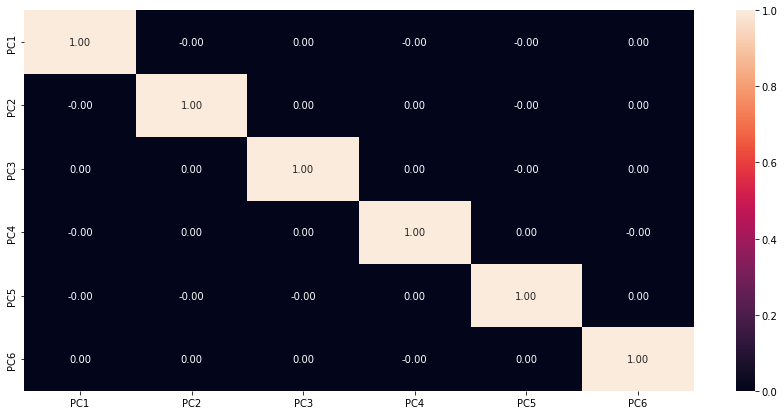

In [147]:
plt.figure(figsize = (15,7))
sns.heatmap(final_pca_d.corr(), annot=True,fmt='.2f');

linear equation for first PC.

In [148]:
for i in range(0,11):
    print("(",np.round(pca1.components_[0][i],2),")",'*',df2.columns[i], end=' + ')

( -0.13 ) * ProdQual + ( -0.17 ) * Ecom + ( -0.16 ) * TechSup + ( -0.47 ) * CompRes + ( -0.18 ) * Advertising + ( -0.39 ) * ProdLine + ( -0.2 ) * SalesFImage + ( 0.15 ) * ComPricing + ( -0.21 ) * WartyClaim + ( -0.44 ) * OrdBilling + ( -0.47 ) * DelSpeed + 

Part 2: Clustering:

The View in a new windowState_wise_Health_income.csvView in a new window dataset given is about the Health and economic conditions in different States of a country. The Group States based on how similar their situation is, so as to provide these groups to the government so that appropriate measures can be taken to escalate their Health and Economic conditions.
2.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, etc, etc)
2.2. Do you think scaling is necessary for clustering in this case? Justify
2.3. Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them.
2.4. Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and find the silhouette score.
2.5. Describe cluster profiles for the clusters defined. Recommend different priority based actions that need to be taken for different clusters on the bases of their vulnerability situations according to their Economic and Health Conditions.
Data Dictionary for State_wise_Health_income Dataset:
1. States: names of States
2. Health_indeces1: A composite index rolls several related measures (indicators) into a single score that provides a summary of how the health system is performing in the State.
3. Health_indeces2: A composite index rolls several related measures (indicators) into a single score that provides a summary of how the health system is performing in certain areas of the States.
4. Per_capita_income-Per capita income (PCI) measures the average income earned per person in a given area (city, region, country, etc.) in a specified year. It is calculated by dividing the area's total income by its total population.
5. GDP: GDP provides an economic snapshot of a country/state, used to estimate the size of an economy and growth rate

#2.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, etc, 

In [47]:
sf=pd.read_csv('/content/drive/MyDrive/State_wise_Health_income (6).csv')

In [48]:
sf.head(10)

,Unnamed: 0,States,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,0,Bachevo,417,66,564,1823
1,1,Balgarchevo,1485,646,2710,73662
2,2,Belasitsa,654,299,1104,27318
3,3,Belo_Pole,192,25,573,250
4,4,Beslen,43,8,528,22
5,5,Bogolin,69,14,527,73
6,6,Bogoroditsa,307,69,707,1724
7,7,Buchino,10219,1508,7049,449003
8,8,Budiltsi,744,115,809,7497
9,9,Cherniche,2975,857,1600,153299


In [49]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         297 non-null    int64 
 1   States             297 non-null    object
 2   Health_indeces1    297 non-null    int64 
 3   Health_indices2    297 non-null    int64 
 4   Per_capita_income  297 non-null    int64 
 5   GDP                297 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 14.0+ KB


In [50]:
sf.shape

(297, 6)

In [51]:
sf.dtypes

Unnamed: 0            int64
States               object
Health_indeces1       int64
Health_indices2       int64
Per_capita_income     int64
GDP                   int64
dtype: object

In [52]:
sf.duplicated().sum()

0

In [53]:
sf1=sf.drop(['Unnamed: 0','States'],axis=1)

In [54]:
sf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Health_indeces1    297 non-null    int64
 1   Health_indices2    297 non-null    int64
 2   Per_capita_income  297 non-null    int64
 3   GDP                297 non-null    int64
dtypes: int64(4)
memory usage: 9.4 KB


In [55]:
sf1.isnull().sum()

Health_indeces1      0
Health_indices2      0
Per_capita_income    0
GDP                  0
dtype: int64

In [56]:
sf1.shape

(297, 4)

Health_indeces1
Skew : 0.72


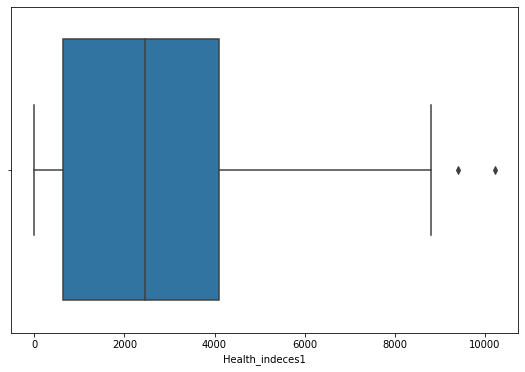

Health_indices2
Skew : -0.17


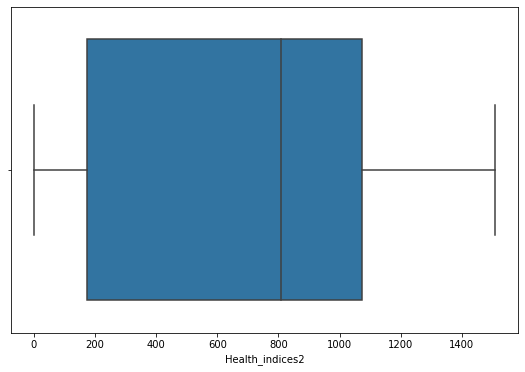

Per_capita_income
Skew : 0.82


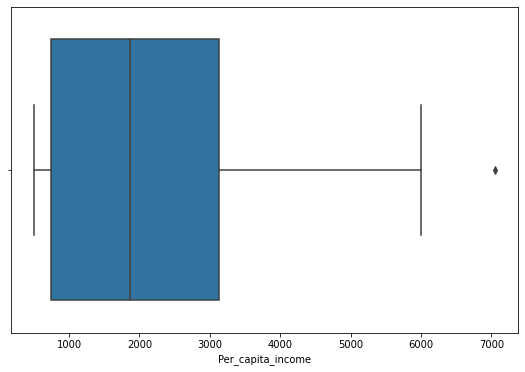

GDP
Skew : 0.83


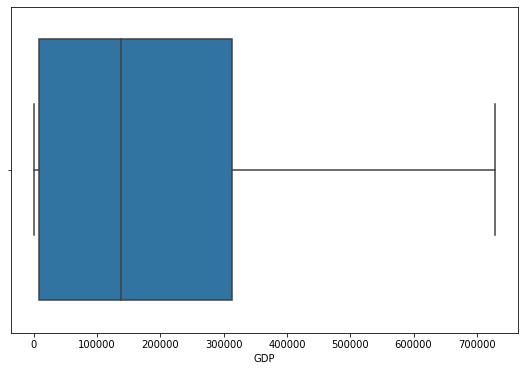

In [57]:
for col in sf1.columns:
    print(col)
    print('Skew :',round(sf1[col].skew(),2))
    plt.figure(figsize=(20,6))
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=sf1[col])
    plt.show()

In [58]:
def remove_outlier(col):
    Q1,Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3+(1.5 * IQR)
    return lower_range, upper_range

In [59]:
for i in sf1.columns:
    LL, UL = remove_outlier(sf1[i])
    sf1[i] = np.where(sf1[i] > UL, UL, sf1[i])
    sf1[i] = np.where(sf1[i] < LL, LL, sf1[i])

Health_indeces1
Skew : 0.67


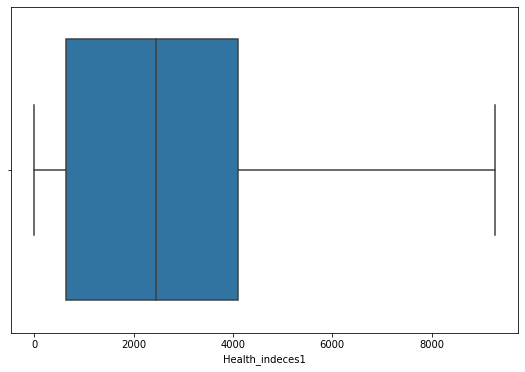

Health_indices2
Skew : -0.17


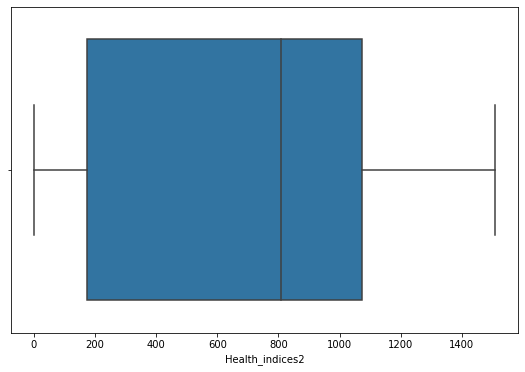

Per_capita_income
Skew : 0.81


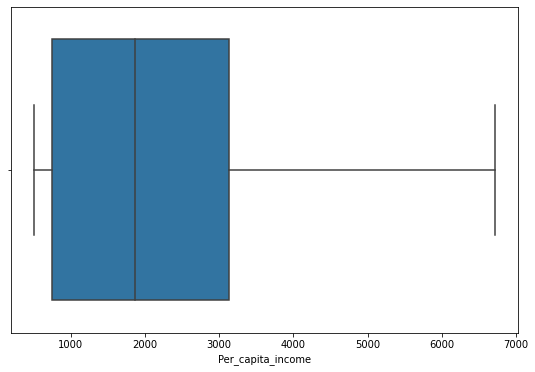

GDP
Skew : 0.83


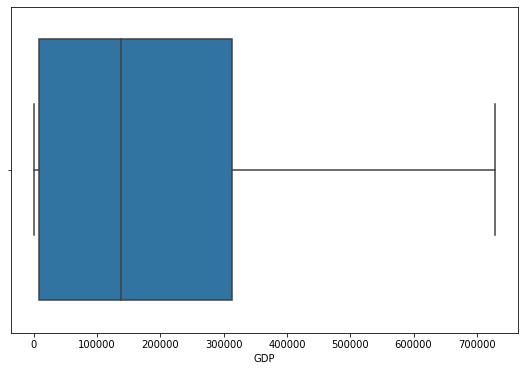

In [60]:
for col in sf1.columns:
    print(col)
    print('Skew :',round(sf1[col].skew(),2))
    plt.figure(figsize=(20,6))
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=sf1[col])
    plt.show()

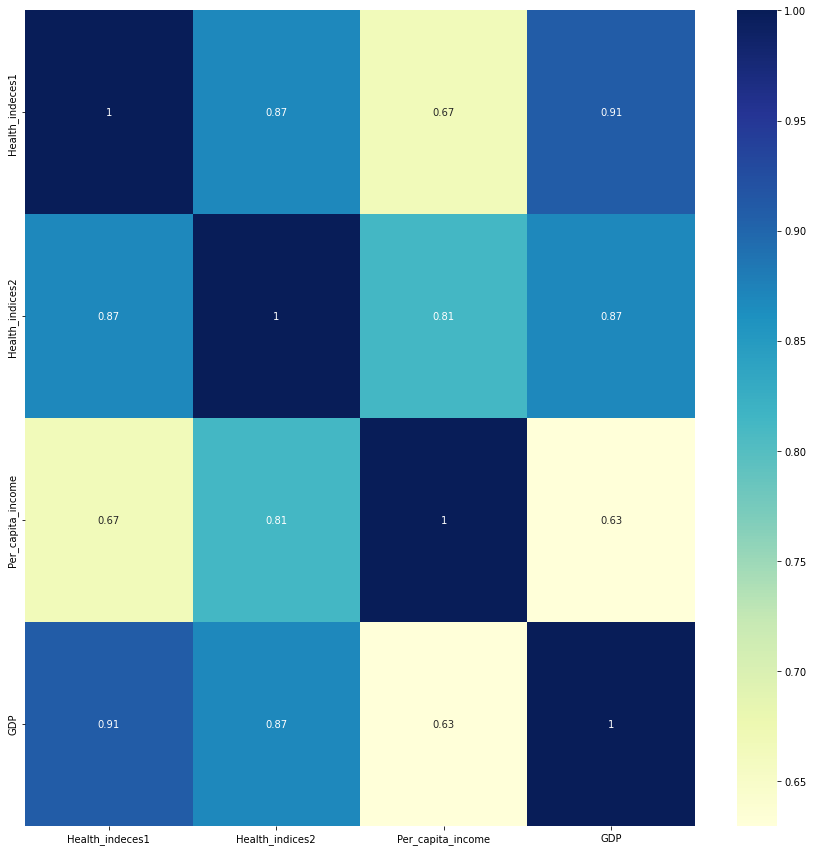

In [61]:
plt.figure(figsize  = (15,15))
sns.heatmap(sf1.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [62]:
sf1_scaled = sf1.apply(zscore)
sf1_scaled.head()

,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,-1.092498,-1.340654,-1.071354,-1.035304
1,-0.564428,-0.101746,0.373007,-0.604838
2,-0.975314,-0.842955,-0.707908,-0.882536
3,-1.203748,-1.428232,-1.065297,-1.044730
4,-1.277421,-1.464545,-1.095584,-1.046096


In [63]:
X = StandardScaler()

In [64]:
sf1_scaled =  X.fit_transform(sf1)
sf1_scaled = pd.DataFrame(sf1_scaled,columns=sf1.columns)
sf1_scaled.head()

,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,-1.092498,-1.340654,-1.071354,-1.035304
1,-0.564428,-0.101746,0.373007,-0.604838
2,-0.975314,-0.842955,-0.707908,-0.882536
3,-1.203748,-1.428232,-1.065297,-1.044730
4,-1.277421,-1.464545,-1.095584,-1.046096


In [65]:
sf1_scaled.describe()

,Health_indeces1,Health_indices2,Per_capita_income,GDP
count,2.970000e+02,297.000000,2.970000e+02,2.970000e+02
mean,-4.784800e-17,0.000000,-9.569599e-17,4.784800e-17
std,1.001688e+00,1.001688,1.001688e+00,1.001688e+00
min,-1.303627e+00,-1.481634,-1.114429e+00,-1.046096e+00
25%,-9.817414e-01,-1.107825,-9.454942e-01,-9.939707e-01
50%,-8.679136e-02,0.248566,-1.957187e-01,-2.242731e-01
75%,7.255859e-01,0.810346,6.603983e-01,8.298516e-01
max,3.286577e+00,1.739527,3.069237e+00,3.319468e+00


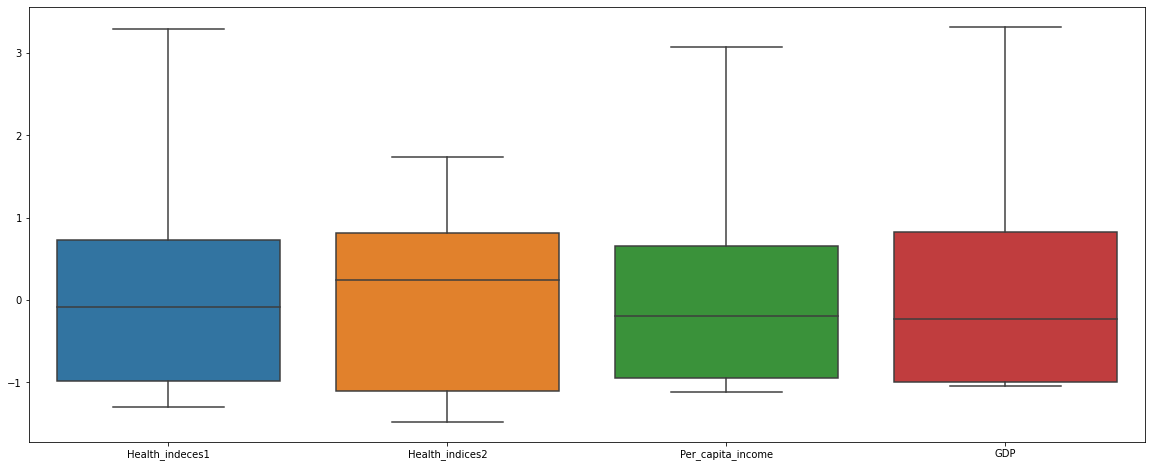

In [154]:
plt.figure(figsize = (20,8))
sns.boxplot(data = sf1_scaled)
plt.show()

#Hierarchical Clustering

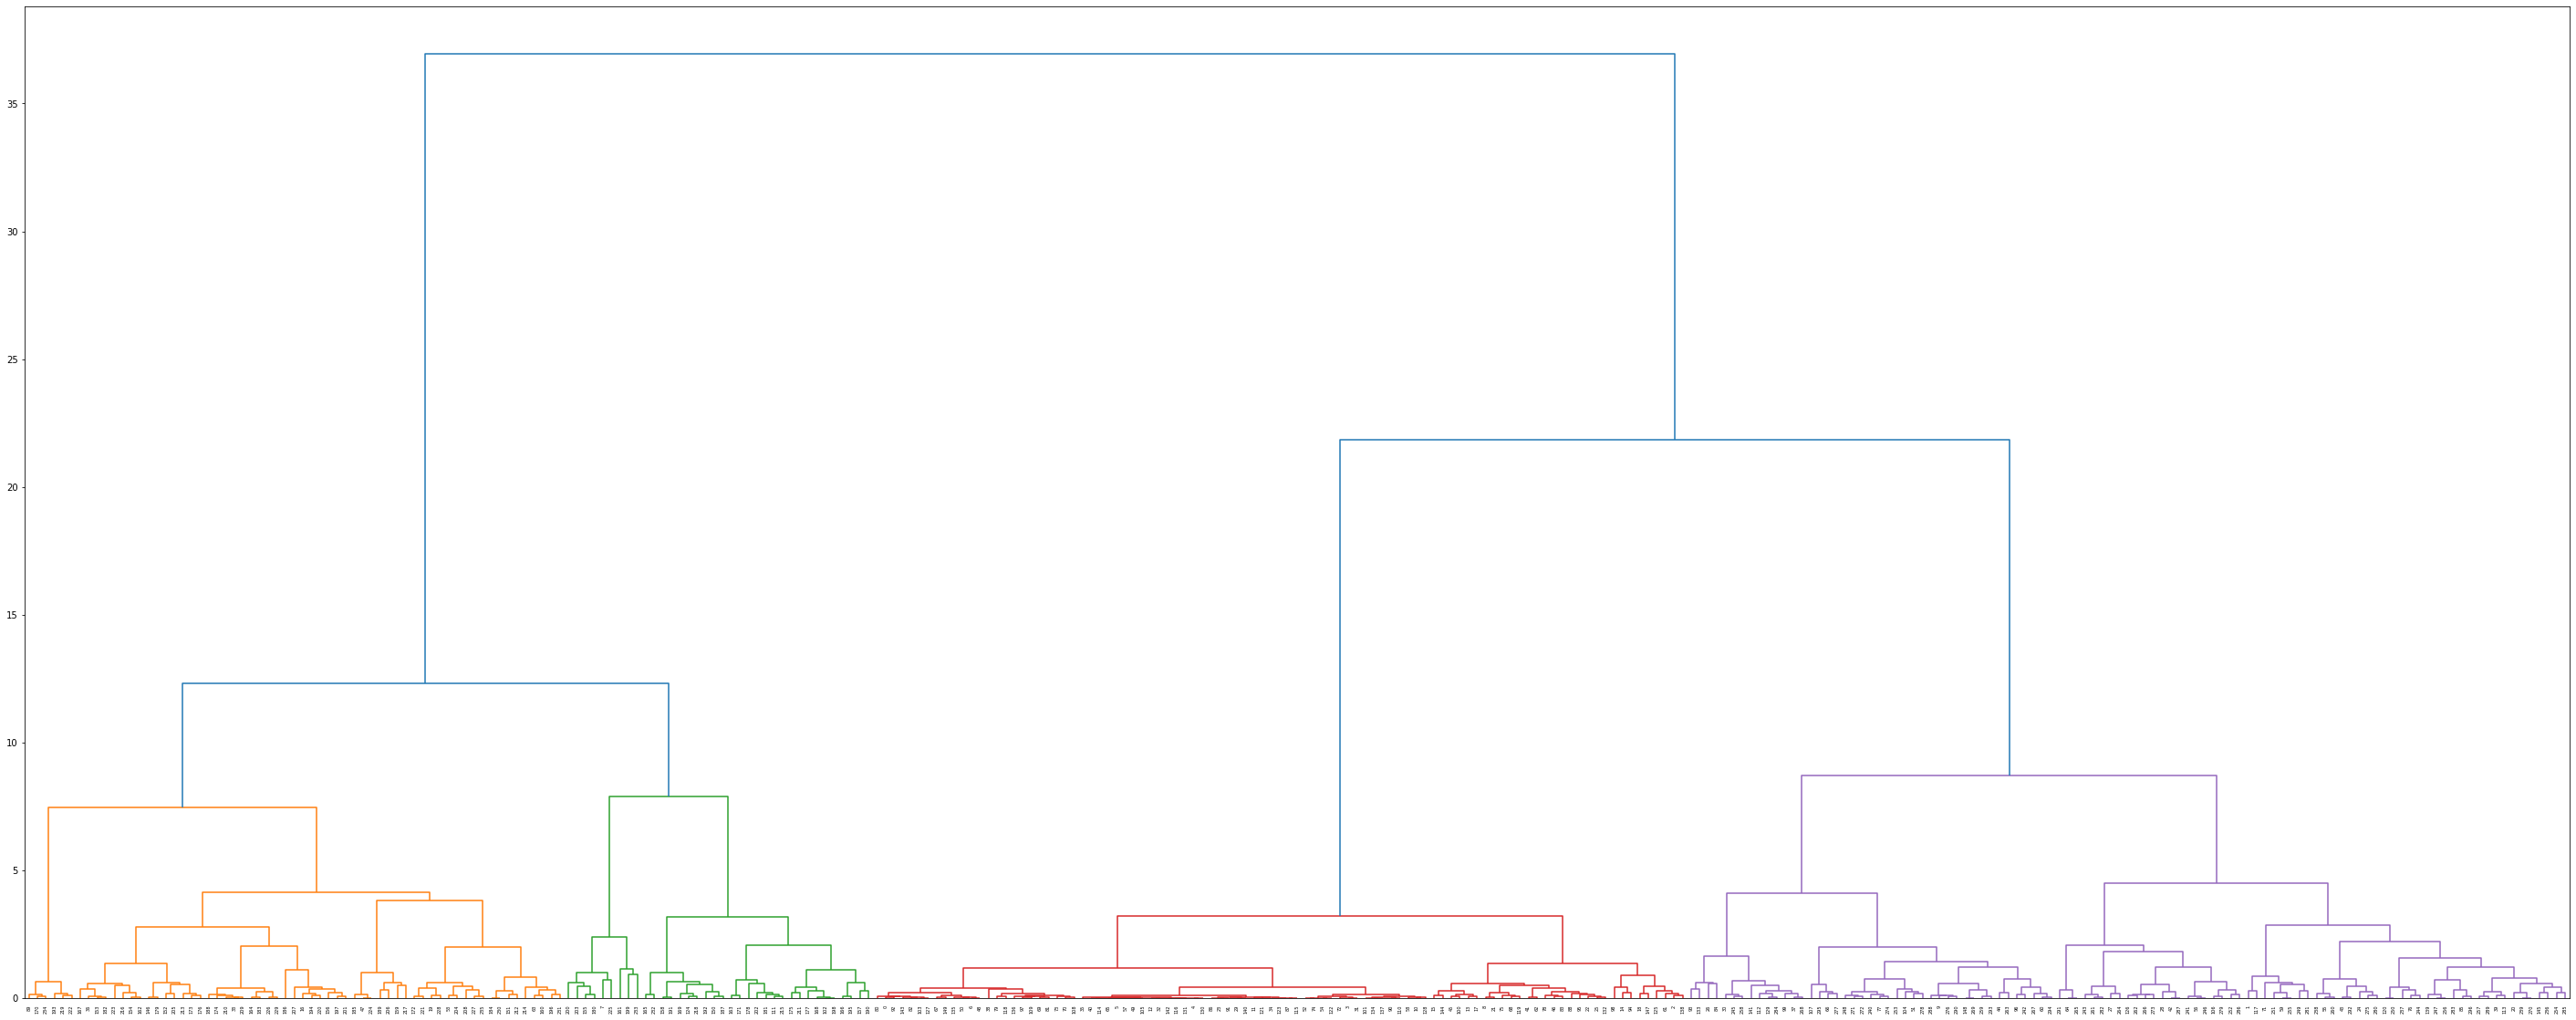

In [66]:
plt.figure(figsize  = (50,20))
wardlink = linkage(sf1_scaled, method ='ward')
dend = dendrogram((wardlink),color_threshold =10)
plt.axhline(140,color='black',linestyle = '--');

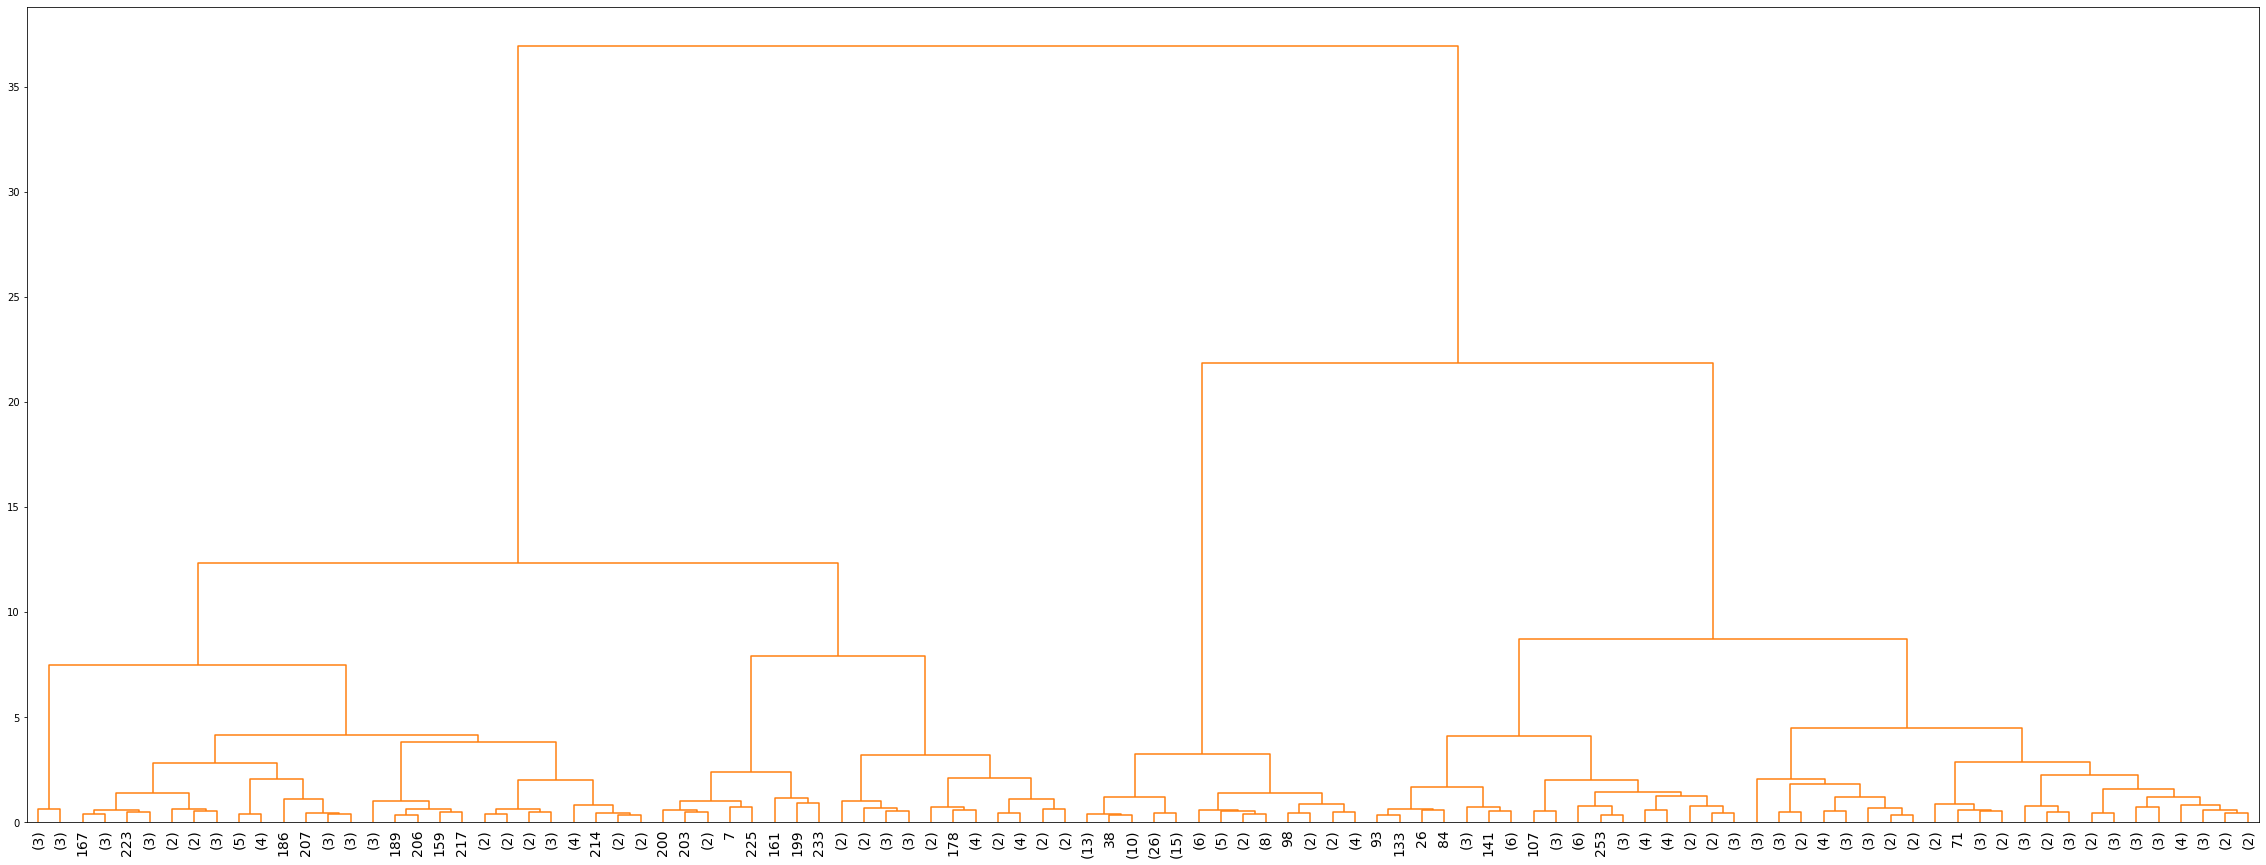

In [118]:
plt.figure(figsize  = (40,15));
final = linkage(sf1_scaled,'ward',metric = 'euclidean')
dend = dendrogram(final, truncate_mode='lastp', p = 10,leaf_rotation=90,color_threshold=90,leaf_font_size=14);
plt.axhline(140,color='black',linestyle = '--');

In [68]:
from sklearn.cluster import AgglomerativeClustering

In [69]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
Clus_ag=cluster.fit_predict(sf1_scaled)
print(Clus_ag)

[2 0 2 2 2 2 2 1 2 0 2 2 2 2 2 2 0 2 2 0 0 2 2 2 0 2 2 0 0 2 2 2 2 0 2 2 0
 2 2 0 2 2 0 0 0 2 2 0 2 2 2 0 2 0 2 0 0 2 2 0 0 2 2 0 0 2 0 2 2 2 2 0 2 2
 2 2 0 0 2 2 2 2 2 2 2 0 2 2 2 3 2 2 2 2 2 2 0 2 2 2 2 2 0 2 0 2 0 0 2 2 2
 0 2 0 2 2 2 0 2 2 0 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 0 2
 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 3 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0
 3 0 0 1 0 0 0 0 0 0 0 1 3 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0]


In [70]:
sf1_scaled

,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,-1.092498,-1.340654,-1.071354,-1.035304
1,-0.564428,-0.101746,0.373007,-0.604838
2,-0.975314,-0.842955,-0.707908,-0.882536
3,-1.203748,-1.428232,-1.065297,-1.044730
4,-1.277421,-1.464545,-1.095584,-1.046096
...,...,...,...,...
292,0.403701,0.590333,0.230994,0.383704
293,0.166366,0.212253,-0.604932,-0.070528
294,0.321128,-0.180780,-0.426574,-0.326073
295,0.413590,0.327599,-0.822326,0.148615


In [71]:
wss = []

In [72]:
from sklearn.cluster import KMeans 

In [73]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(sf1_scaled)
    wss.append(KM.inertia_)

In [74]:
wss

[1188.0,
 469.3294729619331,
 258.4467041090695,
 181.7379852621384,
 147.732018640434,
 116.66502978193046,
 90.00769637970964,
 78.85889729505061,
 70.80202905336024,
 62.82936382038305]

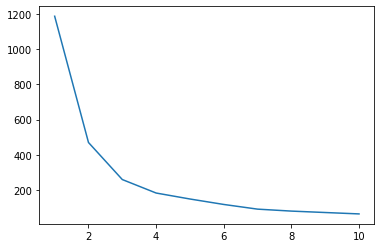

In [75]:
plt.plot(range(1,11), wss)

In [108]:
k_means = KMeans(n_clusters = 3)
k_means.fit(sf1_scaled)
labels = k_means.labels_

In [109]:
sf1['kmeans']= labels
sf1.head()

,Health_indeces1,Health_indices2,Per_capita_income,GDP,kmeans,sil_width,Clus_kmeans_,KMEANS_LABELS
0,417.0,66.0,564.0,1823.0,1,0.823627,0,1
1,1485.0,646.0,2710.0,73662.0,2,0.225539,4,3
2,654.0,299.0,1104.0,27318.0,1,0.306273,0,1
3,192.0,25.0,573.0,250.0,1,0.830682,0,1
4,43.0,8.0,528.0,22.0,1,0.810350,0,1


In [121]:
silhouette_score(sf1_scaled, labels)

0.5167477722669528

In [122]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
for n_clusters in range_n_clusters:
    k_means = KMeans(n_clusters)
    k_means.fit(sf1_scaled)
    labels = k_means.labels_

    silhouette_avg = silhouette_score(sf1_scaled, labels)
    print("For clusters =",n_clusters,"The average silhouette_score is:",silhouette_avg)

For clusters = 2 The average silhouette_score is: 0.5313945367693249
For clusters = 3 The average silhouette_score is: 0.5340151343712788
For clusters = 4 The average silhouette_score is: 0.5524561729411546
For clusters = 5 The average silhouette_score is: 0.5208181010553294
For clusters = 6 The average silhouette_score is: 0.5320893142414745
For clusters = 7 The average silhouette_score is: 0.5550906360809267
For clusters = 8 The average silhouette_score is: 0.5342932176693953
For clusters = 9 The average silhouette_score is: 0.5118712298769437
For clusters = 10 The average silhouette_score is: 0.49094688987818824


In [126]:
ss={1:0}
ss[n_clusters]=round(silhouette_avg,5)



In [128]:
silhouette_width = silhouette_samples(sf1_scaled, labels)

In [129]:
sf1['sil_width'] = silhouette_width

Text(0.5, 0, 'Number of clusters')

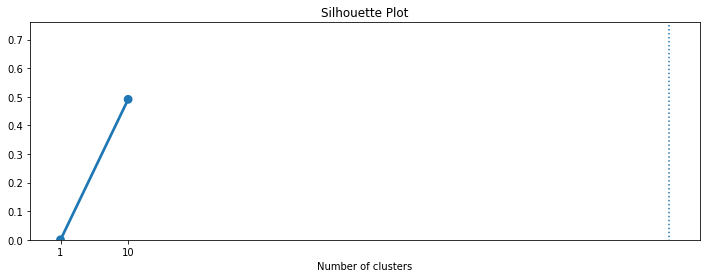

In [130]:
maxkey= [key for key, value in ss.items() if value == max(ss.values())][0]
fig,ax = plt.subplots(figsize=(12,4))
sns.pointplot(list(ss.keys()),list(ss.values()))
plt.vlines(x=maxkey-1,ymax=0,ymin=0.75,linestyles='dotted')
ax.set(ylim=(0, 0.76))
ax.set_title('Silhouette Plot')
ax.set_xlabel('Number of clusters')

In [114]:
sf1.head()

,Health_indeces1,Health_indices2,Per_capita_income,GDP,kmeans,sil_width,Clus_kmeans_,KMEANS_LABELS
0,417.0,66.0,564.0,1823.0,1,0.866803,0,1
1,1485.0,646.0,2710.0,73662.0,2,0.271586,4,3
2,654.0,299.0,1104.0,27318.0,1,0.604076,0,1
3,192.0,25.0,573.0,250.0,1,0.867404,0,1
4,43.0,8.0,528.0,22.0,1,0.851289,0,1


In [115]:
silhouette_samples(sf1_scaled, labels).min()

-0.026549102385048522

In [84]:
k_means = KMeans(n_clusters = 8, random_state = 1)
k_means.fit(sf1_scaled)
labels_8 = k_means.labels_
silhouette_score(sf1_scaled, labels_8, random_state = 1)

0.5342932176693953

In [85]:
sf1["Clus_kmeans_"] = labels_8

In [86]:
sf1.head()

,Health_indeces1,Health_indices2,Per_capita_income,GDP,kmeans,sil_width,Clus_kmeans_
0,417.0,66.0,564.0,1823.0,0,0.823627,0
1,1485.0,646.0,2710.0,73662.0,1,0.225539,4
2,654.0,299.0,1104.0,27318.0,0,0.306273,0
3,192.0,25.0,573.0,250.0,0,0.830682,0
4,43.0,8.0,528.0,22.0,0,0.810350,0


In [87]:
freq = sf1.Clus_kmeans_.value_counts().sort_index()
freq

0    97
1    41
2    47
3    27
4    48
5     9
6    22
7     6
Name: Clus_kmeans_, dtype: int64

In [91]:
clusterer = KMeans(n_clusters =6, init = 'k-means++', random_state = 1)

clusterer.fit_predict(sf1_scaled)

labels = clusterer.labels_

In [97]:
sf1['KMEANS_LABELS'] = labels

In [98]:
clust_profile=sf1
clust_profile=clust_profile.groupby('KMEANS_LABELS').mean()
clust_profile['freq']=sf1.KMEANS_LABELS.value_counts().sort_index()
np.round(clust_profile,2).T

KMEANS_LABELS,0,1,2,3,4,5
Health_indeces1,4816.07,444.40,4116.97,2362.12,8208.22,2815.98
Health_indices2,1140.82,108.02,1293.00,848.38,1369.67,675.96
Per_capita_income,2319.30,686.81,4728.33,3160.00,5555.44,1530.96
GDP,399053.82,7241.66,342126.67,143591.27,426759.11,133085.91
kmeans,1.98,0.00,2.90,1.00,3.00,0.94
sil_width,0.42,0.71,0.42,0.36,0.50,0.41
Clus_kmeans_,2.68,0.02,2.97,4.29,5.00,2.09
freq,57.00,98.00,30.00,56.00,9.00,47.00


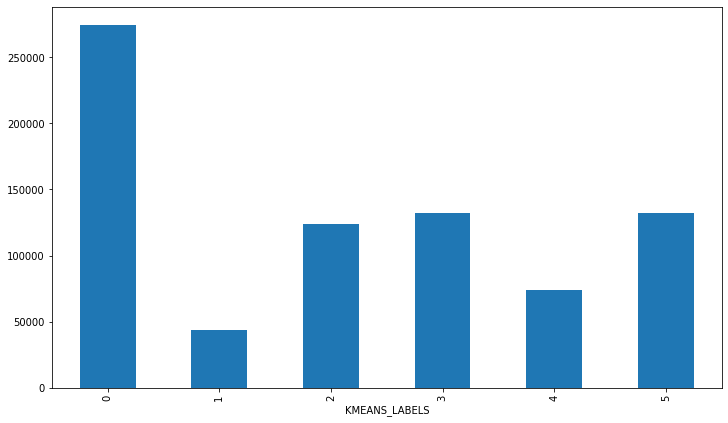

In [103]:
sf1.groupby(['KMEANS_LABELS']).sum()['Health_indeces1'].plot(kind='bar',figsize=(12,7));

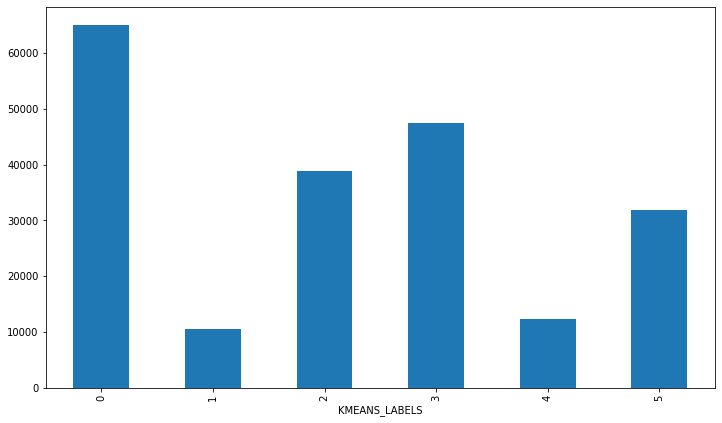

In [105]:
sf1.groupby(['KMEANS_LABELS']).sum()['Health_indices2'].plot(kind='bar',figsize=(12,7));

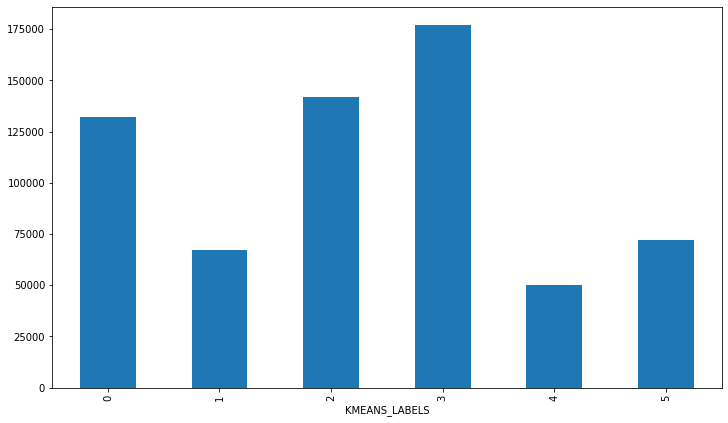

In [106]:
sf1.groupby(['KMEANS_LABELS']).sum()['Per_capita_income'].plot(kind='bar',figsize=(12,7));

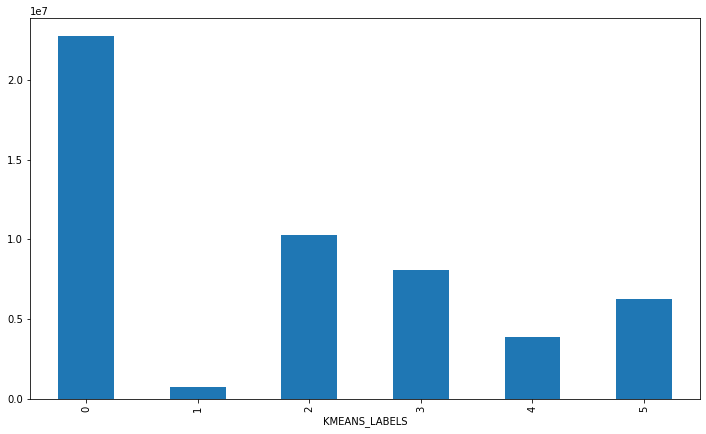

In [107]:
sf1.groupby(['KMEANS_LABELS']).sum()['GDP'].plot(kind='bar',figsize=(12,7));